In [ ]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import array as arr
import math

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Education/A&M/2023 - Summer/STAT 335/STAT 335 Midterm/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/0B4oudl5CSwZkTmFSY0o4WXI5YjA/Education/A&M/2023 - Summer/STAT 335/STAT 335 Midterm


# Link to kaggle documentation

https://www.kaggle.com/datasets/tanatmetmaolee/nba-player-statistics-2023

# Link to Medium edit page

https://medium.com/p/d45529134dfc/edit
login: stat335summer2023@gmail.com
pass: TAMUsummer2023

In [ ]:
df = pd.read_csv('2023_nba_player_stats.csv')
df.head(10)

,Player,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25.0,74.0,52.0,22.0,2732.2,2225.0,727.0,...,649.0,342.0,213.0,78.0,51.0,160.0,3691.0,31.0,1.0,470.0
1,Joel Embiid,C,PHI,29.0,66.0,43.0,23.0,2284.1,2183.0,728.0,...,670.0,274.0,226.0,66.0,112.0,205.0,3706.0,39.0,1.0,424.0
2,Luka Doncic,PG,DAL,24.0,66.0,33.0,33.0,2390.5,2138.0,719.0,...,569.0,529.0,236.0,90.0,33.0,166.0,3747.0,36.0,10.0,128.0
3,Shai Gilgeous-Alexander,PG,OKC,24.0,68.0,33.0,35.0,2416.0,2135.0,704.0,...,329.0,371.0,192.0,112.0,65.0,192.0,3425.0,3.0,0.0,149.0
4,Giannis Antetokounmpo,PF,MIL,28.0,63.0,47.0,16.0,2023.6,1959.0,707.0,...,742.0,359.0,246.0,52.0,51.0,197.0,3451.0,46.0,6.0,341.0
5,Anthony Edwards,SG,MIN,21.0,79.0,40.0,39.0,2841.5,1946.0,707.0,...,458.0,350.0,259.0,125.0,58.0,186.0,3311.0,9.0,0.0,97.0
6,Julius Randle,PF,NYK,28.0,77.0,44.0,33.0,2737.3,1936.0,658.0,...,767.0,316.0,216.0,49.0,21.0,233.0,3324.0,40.0,0.0,170.0
7,Donovan Mitchell,SG,CLE,26.0,68.0,44.0,24.0,2432.4,1922.0,679.0,...,289.0,301.0,180.0,99.0,27.0,168.0,2918.0,5.0,0.0,338.0
8,Trae Young,PG,ATL,24.0,73.0,38.0,35.0,2540.7,1914.0,597.0,...,217.0,741.0,300.0,80.0,9.0,104.0,3253.0,40.0,0.0,100.0
9,Zach LaVine,SG,CHI,28.0,77.0,38.0,39.0,2767.9,1913.0,673.0,...,345.0,327.0,194.0,69.0,18.0,159.0,2885.0,2.0,0.0,18.0


In [ ]:
df[df.Age == max(df["Age"])] # oldest player in the NBA

,Player,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
474,Udonis Haslem,PF,MIA,42.0,7.0,4.0,3.0,72.1,27.0,10.0,...,11.0,0.0,1.0,1.0,2.0,11.0,48.0,0.0,0.0,-25.0


In [ ]:
df[df.Age == min(df["Age"])] # youngest player in the NBA

,Player,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
97,Jabari Smith Jr.,PF,HOU,19.0,79.0,21.0,58.0,2450.5,1010.0,364.0,...,569.0,101.0,104.0,43.0,74.0,227.0,2091.0,16.0,0.0,-555.0
129,Shaedon Sharpe,SG,POR,19.0,80.0,32.0,48.0,1778.6,789.0,306.0,...,236.0,94.0,83.0,38.0,24.0,136.0,1316.0,0.0,0.0,-297.0
166,Malaki Branham,G,SAS,19.0,66.0,15.0,51.0,1549.6,673.0,269.0,...,181.0,127.0,76.0,33.0,7.0,115.0,1125.0,0.0,0.0,-364.0
184,AJ Griffin,F,ATL,19.0,72.0,34.0,38.0,1401.4,639.0,248.0,...,153.0,73.0,42.0,42.0,12.0,87.0,1052.0,0.0,0.0,63.0
194,Jeremy Sochan,F,SAS,19.0,56.0,15.0,41.0,1457.7,614.0,250.0,...,295.0,142.0,97.0,43.0,23.0,138.0,1282.0,2.0,0.0,-235.0
195,Jalen Duren,C,DET,19.0,67.0,16.0,51.0,1670.1,612.0,258.0,...,595.0,75.0,92.0,44.0,59.0,182.0,1656.0,19.0,0.0,-279.0
355,Ousmane Dieng,F,OKC,19.0,39.0,20.0,19.0,568.7,193.0,76.0,...,105.0,46.0,26.0,14.0,7.0,42.0,425.0,0.0,0.0,39.0
409,Dominick Barlow,F,SAS,19.0,28.0,5.0,23.0,407.6,110.0,46.0,...,102.0,24.0,15.0,10.0,19.0,56.0,340.0,2.0,0.0,-108.0
426,Nikola Jovic,F,MIA,19.0,15.0,7.0,8.0,204.5,82.0,28.0,...,31.0,10.0,10.0,7.0,2.0,19.0,151.0,0.0,0.0,-16.0
511,Kendall Brown,SG,IND,19.0,6.0,1.0,5.0,40.3,9.0,4.0,...,6.0,3.0,2.0,4.0,0.0,9.0,31.0,0.0,0.0,4.0


In [ ]:
meanPTSbyAge = []
i=19
while (i <= 42):
  j = df[df.Age == i]
  if math.isnan(np.mean(j["PTS"])):
    meanPTSbyAge.append(0.0)
  else:
    meanPTSbyAge.append(np.mean(j["PTS"]))
  i += 1
meanPTSbyAge

[430.3636363636364,
 343.1923076923077,
 493.7631578947368,
 448.7959183673469,
 474.6923076923077,
 536.1694915254237,
 500.125,
 589.6744186046511,
 513.95,
 792.047619047619,
 569.030303030303,
 601.1428571428571,
 592.2777777777778,
 560.2941176470588,
 820.3571428571429,
 498.53333333333336,
 623.0,
 277.875,
 467.0,
 1590.0,
 17.0,
 0.0,
 0.0,
 27.0]

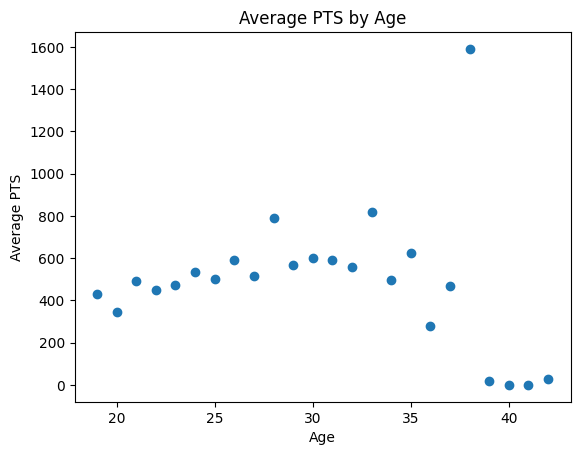

In [ ]:
plt.scatter(range(19,43), meanPTSbyAge)
plt.xlabel("Age")
plt.ylabel("Average PTS")
plt.title("Average PTS by Age")
plt.show()

In [ ]:
df[df.Age == 38] # That is so funny that lebron brings the average pts for his age so high, because he is the only 38 year old

,Player,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
24,LeBron James,SF,LAL,38.0,55.0,30.0,25.0,1953.9,1590.0,609.0,...,457.0,375.0,178.0,50.0,32.0,88.0,2769.0,18.0,2.0,214.0


In [ ]:
# sorting by position
point = df[df.POS == 'PG'] #77 players
shoot = df[df.POS == 'SG'] #96 players
small = df[df.POS == 'SF'] #77 players
power = df[df.POS == 'PF'] #74 players
center = df[df.POS == 'C'] #78 players

#we can use these new data subsets to check different stats per position (points,rebounds,etc. and how they compare)

In [ ]:
#convert to list to use list operations
pg_list = list(point["PTS"])
sg_list = list(shoot["PTS"])
sf_list = list(small["PTS"])
pf_list = list(power["PTS"])
c_list = list(center["PTS"])

In [ ]:
avg_pg_points = sum(pg_list)/len(pg_list)
avg_sg_points = sum(sg_list)/len(sg_list)
avg_sf_points = sum(sf_list)/len(sf_list)
avg_pf_points = sum(pf_list)/len(pf_list)
avg_c_points = sum(c_list)/len(c_list)
#finding average points per position


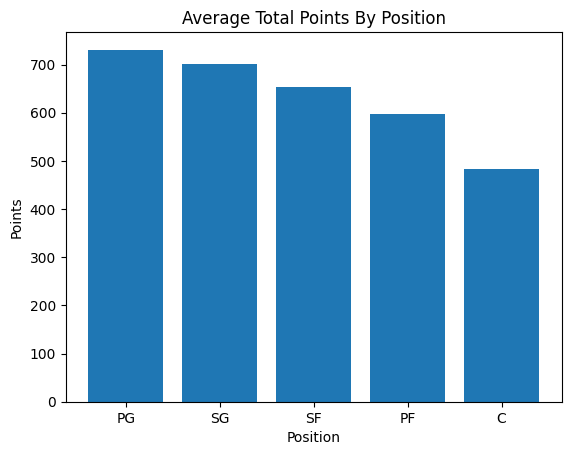

In [ ]:
x_axis = ['PG', 'SG', 'SF', 'PF','C']
y_axis = [avg_pg_points,avg_sg_points,avg_sf_points,avg_pf_points,avg_c_points]

plt.bar(x_axis, y_axis)
plt.title('Average Total Points By Position')
plt.xlabel('Position')
plt.ylabel('Points')
plt.show()
#creates bar chart with average points per position, we can see chart has downward trend PG->SG->SF->PF->C
#we can assume on average, point guards are higher scorers than other positions


In [ ]:
atlanta = df[df.Team == 'ATL']
boston = df[df.Team == 'BOS']
brooklyn = df[df.Team == 'BKN']
hornets = df[df.Team == 'CHA']
chicago = df[df.Team == 'CHI']
cleveland = df[df.Team == 'CLE']
dallas = df[df.Team == 'DAL']
denver = df[df.Team == 'DEN']
detroit = df[df.Team == 'DET']
warriors = df[df.Team == 'GSW']
houston = df[df.Team == 'HOU']
indiana = df[df.Team == 'IND']
clippers = df[df.Team == 'LAC']
lakers = df[df.Team == 'LAL']
memphis = df[df.Team == 'MEM']
miami = df[df.Team == 'MIA']
bucks = df[df.Team == 'MIL']
t_wolves = df[df.Team == 'MIN']
pelicans = df[df.Team == 'NOP']
knicks = df[df.Team == 'NYK']
thunder = df[df.Team == 'OKC']
magic = df[df.Team == 'ORL']
phil_76 = df[df.Team == 'PHI']
suns = df[df.Team == 'PHX']
blazers = df[df.Team == 'POR']
kings = df[df.Team == 'SAC']
spurs = df[df.Team == 'SAS']
raptors = df[df.Team == 'TOR']
jazz = df[df.Team == 'UTA']
wizards = df[df.Team == 'WAS']
#split data into team rosters
#can do data analysis on team stats rather than just players (avg. winning percentage, avg. fgs made etc.)

In [ ]:
df.describe()

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,...,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,25.981273,48.473783,24.234082,24.239700,1113.872097,528.327715,193.370787,406.762172,46.758989,56.852060,...,200.089888,116.621723,61.870787,33.576779,21.440075,92.026217,1046.601124,4.048689,0.222846,0.014981
std,4.322334,24.353600,14.390802,13.318252,824.781963,497.816349,178.213527,369.267397,10.054317,60.955976,...,181.671630,129.703411,58.251188,28.291048,26.573117,65.934979,892.635107,8.803327,1.571606,148.917053
min,19.000000,1.000000,0.000000,0.000000,2.100000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-642.000000
25%,23.000000,31.000000,13.000000,14.000000,343.100000,122.500000,47.000000,99.500000,41.725000,5.000000,...,52.250000,23.000000,15.000000,9.000000,5.000000,33.000000,278.500000,0.000000,0.000000,-70.000000
50%,25.000000,55.000000,25.000000,25.500000,984.050000,381.000000,140.000000,305.500000,45.550000,37.000000,...,161.000000,69.000000,44.500000,28.000000,13.000000,87.500000,833.500000,0.000000,0.000000,-7.500000
75%,29.000000,68.000000,36.000000,34.000000,1857.000000,779.750000,284.000000,602.000000,50.750000,92.750000,...,287.500000,163.000000,93.000000,51.750000,28.750000,140.750000,1655.750000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [ ]:
df.corr(method='pearson')

<ipython-input-16-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
Age,1.000000,0.079523,0.169102,-0.037305,0.106353,0.091922,0.082073,0.078767,0.065785,0.144153,...,0.073776,0.159881,0.082621,0.079365,0.021846,0.063582,0.108258,0.068314,0.035692,0.228842
GP,0.079523,1.000000,0.888551,0.868480,0.875912,0.705885,0.720035,0.722207,0.173667,0.620303,...,0.719207,0.580178,0.676659,0.753714,0.520734,0.854519,0.769774,0.348807,0.106255,0.118294
W,0.169102,0.888551,1.000000,0.544262,0.794910,0.655785,0.666248,0.659274,0.170246,0.599936,...,0.654390,0.550754,0.600572,0.682970,0.479660,0.748986,0.714172,0.350525,0.146594,0.430905
L,-0.037305,0.868480,0.544262,1.000000,0.742756,0.582175,0.596745,0.608253,0.133608,0.486027,...,0.608045,0.465799,0.588393,0.640261,0.433921,0.753260,0.635915,0.259071,0.035897,-0.249295
Min,0.106353,0.875912,0.794910,0.742756,1.000000,0.907184,0.914632,0.918130,0.149230,0.762010,...,0.797352,0.769514,0.856644,0.867458,0.541975,0.889331,0.943355,0.505932,0.186728,0.228208
PTS,0.091922,0.705885,0.655785,0.582175,0.907184,1.000000,0.993831,0.988609,0.147440,0.766407,...,0.737000,0.793625,0.917586,0.771830,0.471248,0.754438,0.966250,0.589001,0.269916,0.284431
FGM,0.082073,0.720035,0.666248,0.596745,0.914632,0.993831,1.000000,0.985444,0.182602,0.732378,...,0.772870,0.788577,0.917528,0.777255,0.507691,0.774138,0.974243,0.613859,0.276714,0.275413
FGA,0.078767,0.722207,0.659274,0.608253,0.918130,0.988609,0.985444,1.000000,0.085229,0.805707,...,0.704309,0.804568,0.916218,0.789937,0.427818,0.752545,0.952230,0.536290,0.233776,0.237631
FG%,0.065785,0.173667,0.170246,0.133608,0.149230,0.147440,0.182602,0.085229,1.000000,-0.126536,...,0.361143,0.045810,0.136496,0.090090,0.375881,0.245516,0.213653,0.274769,0.088704,0.106186
3PM,0.144153,0.620303,0.599936,0.486027,0.762010,0.766407,0.732378,0.805707,-0.126536,1.000000,...,0.382095,0.618156,0.650815,0.649750,0.162117,0.550606,0.689260,0.182888,0.078193,0.234261


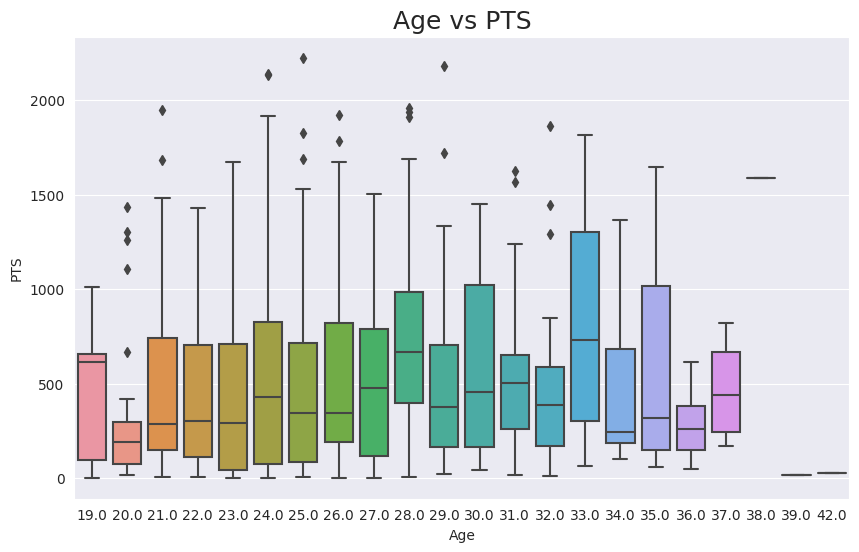

In [ ]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='Age',y='PTS',data=df)
plt.title('Age vs PTS',size=18);

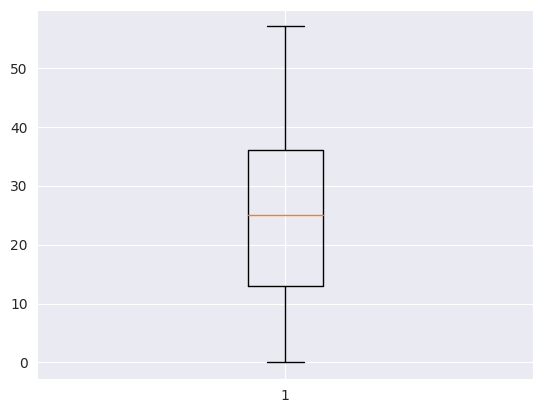

In [ ]:
#from above analysis we can see wins have a strong correlation with alot of the other data, here is a boxplot showing the wins data
plt.boxplot(df['W'])
plt.show()

# Data Cleaning

In [ ]:
df=df.dropna() # remove na values

In [ ]:
df.Player[df.duplicated()==True]

Series([], Name: Player, dtype: object)

<ipython-input-18-7e8aa672740b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,square=True,


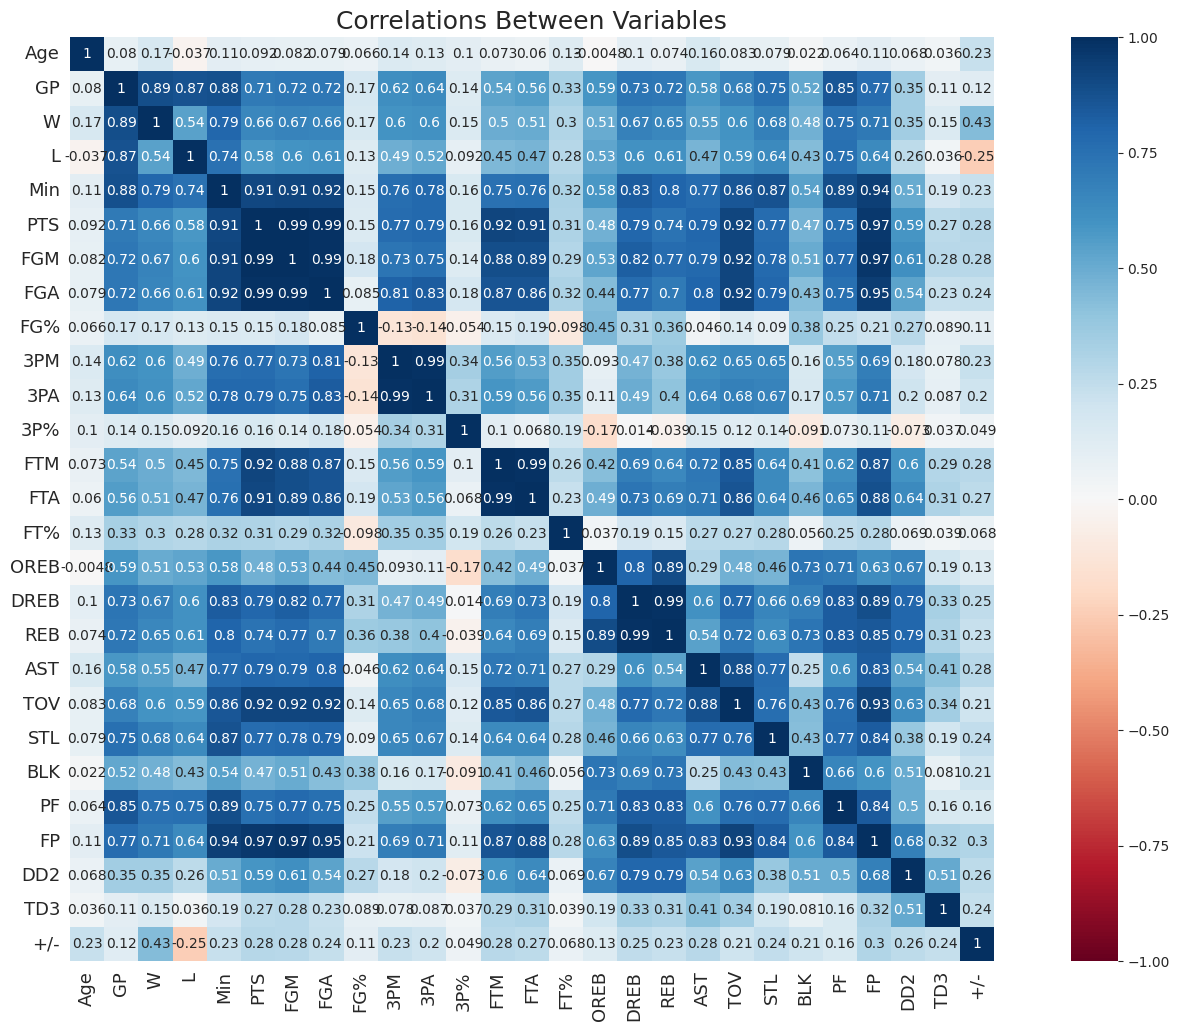

In [ ]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show() # heat map that displays correlatoins

In [ ]:
matrix = df.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.65]

print(matrix['W']) # matrix with correlations related to W that are greater than 6.5

GP      0.888551
W       1.000000
Min     0.794910
PTS     0.655785
FGM     0.666248
FGA     0.659274
DREB    0.673655
REB     0.654390
STL     0.682970
PF      0.748986
FP      0.714172
dtype: float64


<ipython-input-38-898bbdbe0e27>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


# Univariate analysis

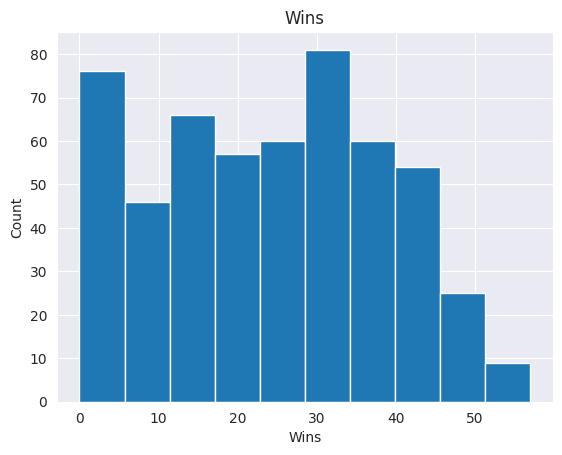

In [ ]:
plt.hist(df["W"])
plt.title('Wins')
plt.xlabel('Wins')
plt.ylabel('Count')
plt.show()

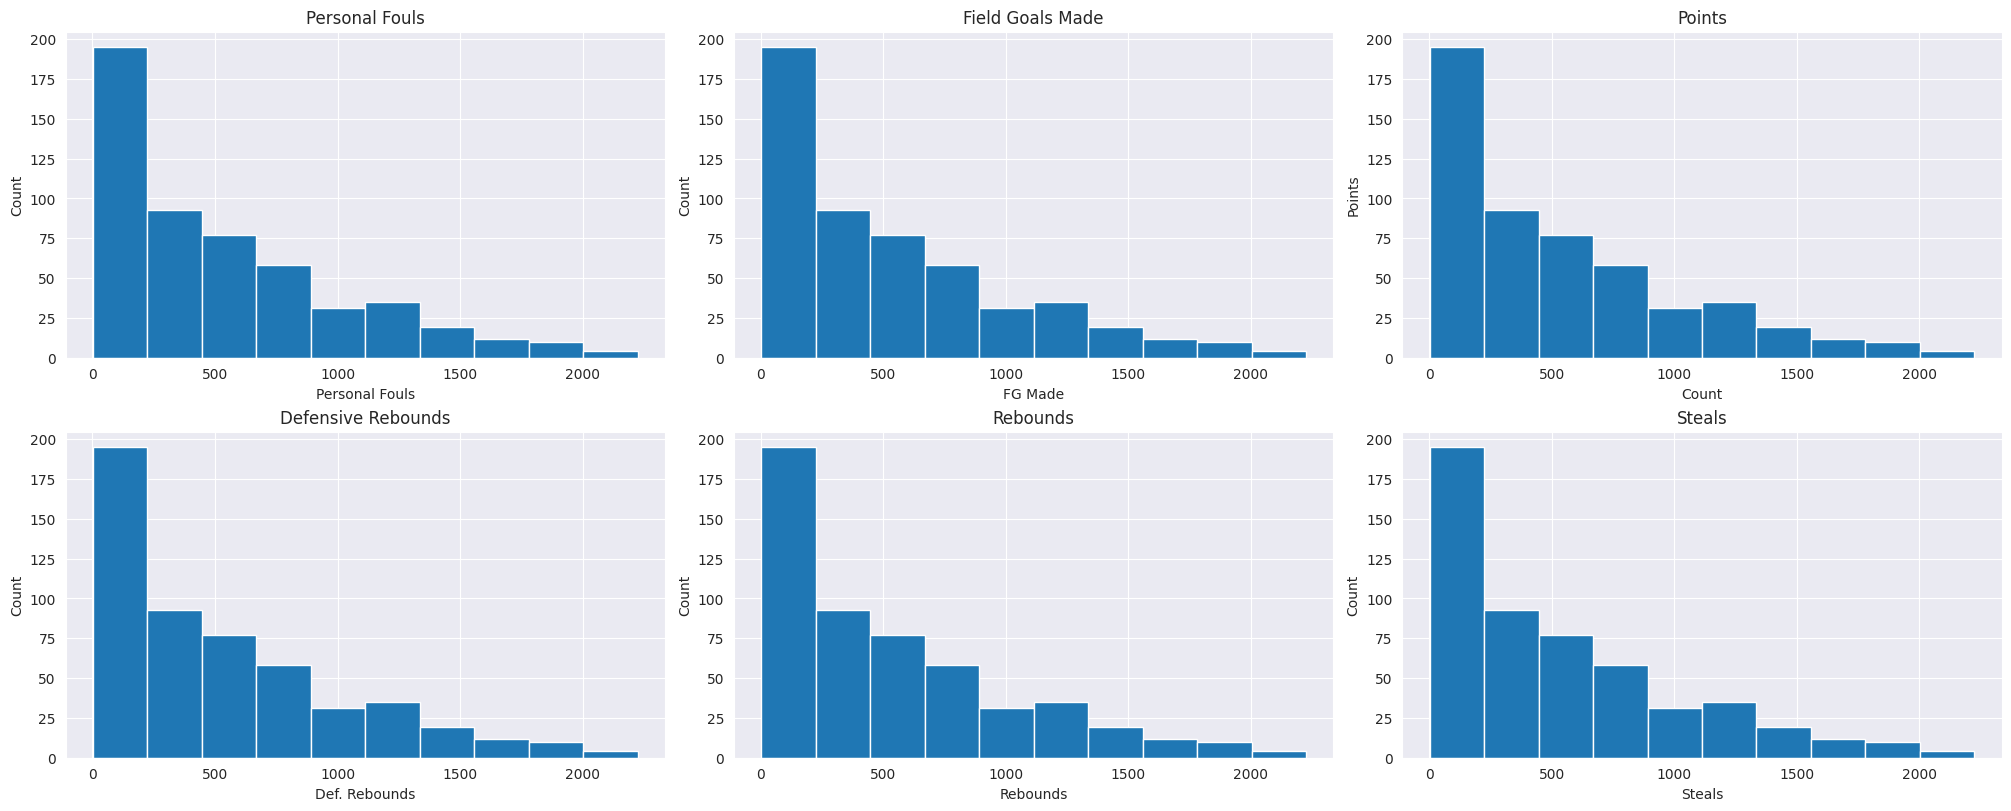

In [ ]:
fig, ax = plt.subplots(2, 3, constrained_layout = True, figsize = (20, 8))

ax[0,2].set_title('Points')
ax[0,2].set_xlabel('Count')
ax[0,2].set_ylabel('Points')
ax[0,2].hist(df["PTS"])

ax[0,1].set_title('Field Goals Made')
ax[0,1].set_xlabel('FG Made')
ax[0,1].set_ylabel('Count')
ax[0,1].hist(df["PTS"])

ax[1,0].set_title('Defensive Rebounds')
ax[1,0].set_xlabel('Def. Rebounds')
ax[1,0].set_ylabel('Count')
ax[1,0].hist(df["PTS"])

ax[1,1].set_title('Rebounds')
ax[1,1].set_xlabel('Rebounds')
ax[1,1].set_ylabel('Count')
ax[1,1].hist(df["PTS"])

ax[1,2].set_title('Steals')
ax[1,2].set_xlabel('Steals')
ax[1,2].set_ylabel('Count')
ax[1,2].hist(df["PTS"])

ax[0,0].set_title('Personal Fouls')
ax[0,0].set_xlabel('Personal Fouls')
ax[0,0].set_ylabel('Count')
ax[0,0].hist(df["PTS"])


plt.show()

# Bivariate Analysis

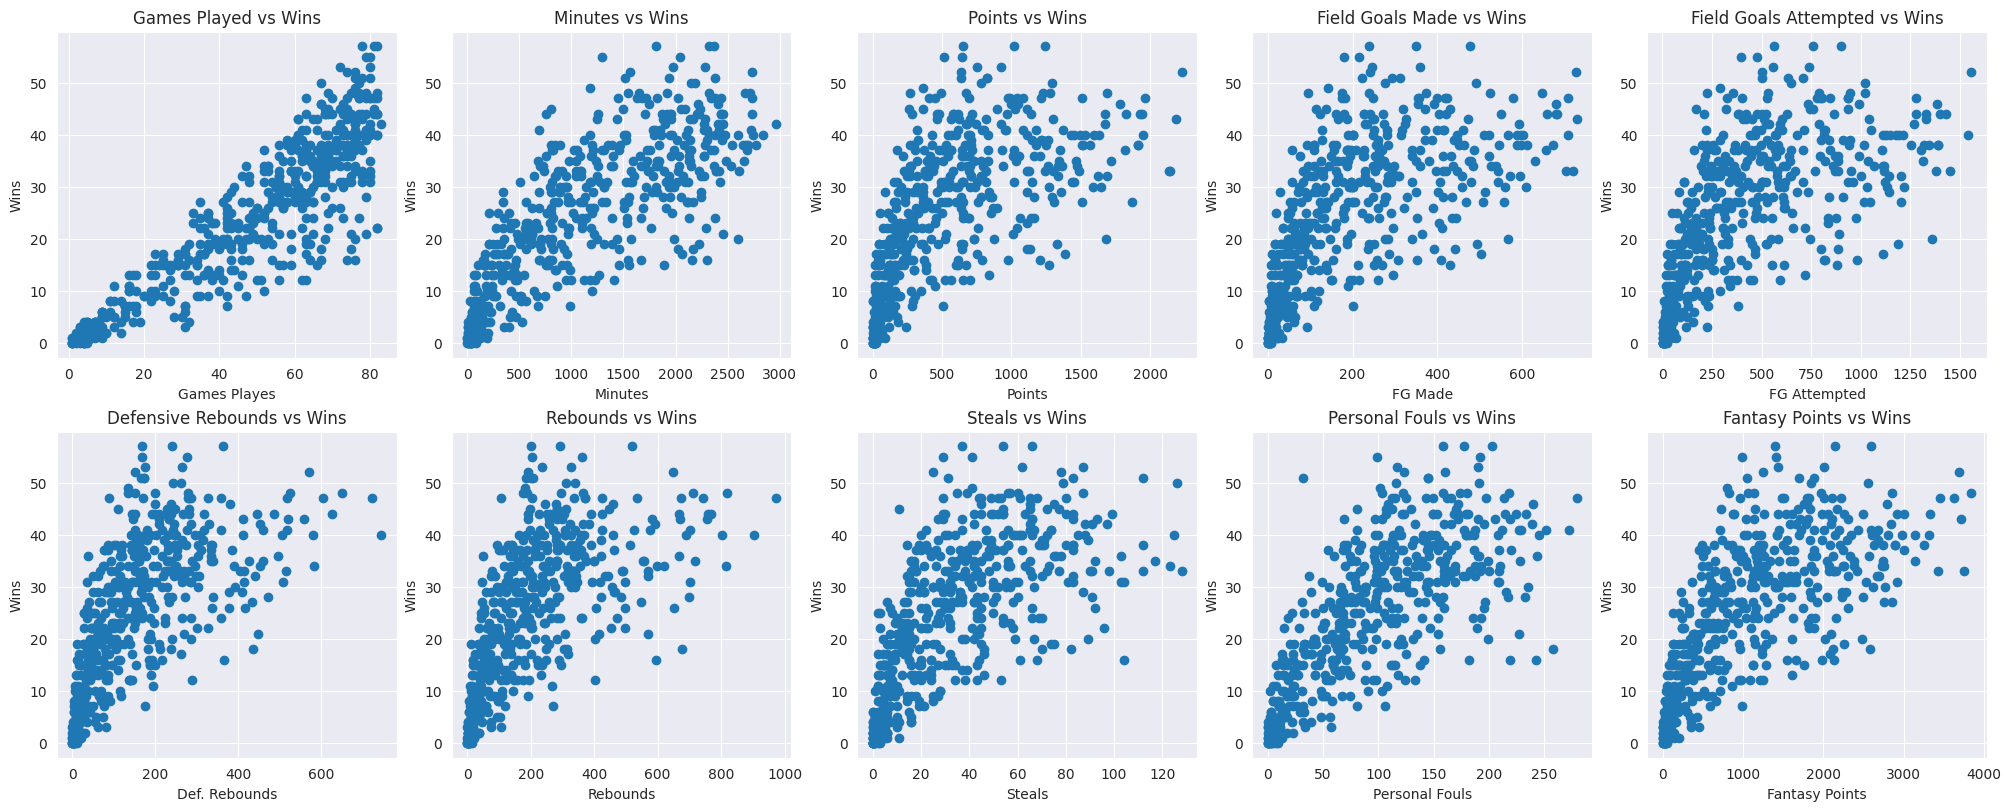

In [ ]:
fig, ax = plt.subplots(2, 5, constrained_layout = True, figsize = (20, 8))

ax[0,0].set_title('Games Played vs Wins')
ax[0,0].scatter(df['GP'], df['W'])
ax[0,0].set_xlabel('Games Playes')
ax[0,0].set_ylabel('Wins')

ax[0,1].set_title('Minutes vs Wins')
ax[0,1].set_xlabel('Minutes')
ax[0,1].set_ylabel('Wins')
ax[0,1].scatter(df['Min'], df['W'])

ax[0,2].set_title('Points vs Wins')
ax[0,2].set_xlabel('Points')
ax[0,2].set_ylabel('Wins')
ax[0,2].scatter(df['PTS'], df['W'])

ax[0,3].set_title('Field Goals Made vs Wins')
ax[0,3].set_xlabel('FG Made')
ax[0,3].set_ylabel('Wins')
ax[0,3].scatter(df['FGM'], df['W'])

ax[0,4].set_title('Field Goals Attempted vs Wins')
ax[0,4].set_xlabel('FG Attempted')
ax[0,4].set_ylabel('Wins')
ax[0,4].scatter(df['FGA'], df['W'])

ax[1,0].set_title('Defensive Rebounds vs Wins')
ax[1,0].set_xlabel('Def. Rebounds')
ax[1,0].set_ylabel('Wins')
ax[1,0].scatter(df['DREB'], df['W'])

ax[1,1].set_title('Rebounds vs Wins')
ax[1,1].set_xlabel('Rebounds')
ax[1,1].set_ylabel('Wins')
ax[1,1].scatter(df['REB'], df['W'])

ax[1,2].set_title('Steals vs Wins')
ax[1,2].set_xlabel('Steals')
ax[1,2].set_ylabel('Wins')
ax[1,2].scatter(df['STL'], df['W'])

ax[1,3].set_title('Personal Fouls vs Wins')
ax[1,3].set_xlabel('Personal Fouls')
ax[1,3].set_ylabel('Wins')
ax[1,3].scatter(df['PF'], df['W'])

ax[1,4].set_title('Fantasy Points vs Wins')
ax[1,4].set_xlabel('Fantasy Points')
ax[1,4].set_ylabel('Wins')
ax[1,4].scatter(df['FP'], df['W'])

plt.show()

# Narrowed Bivariate Analysis

Removed redundant variables (like games played vs wins) and chose variables players have control over.

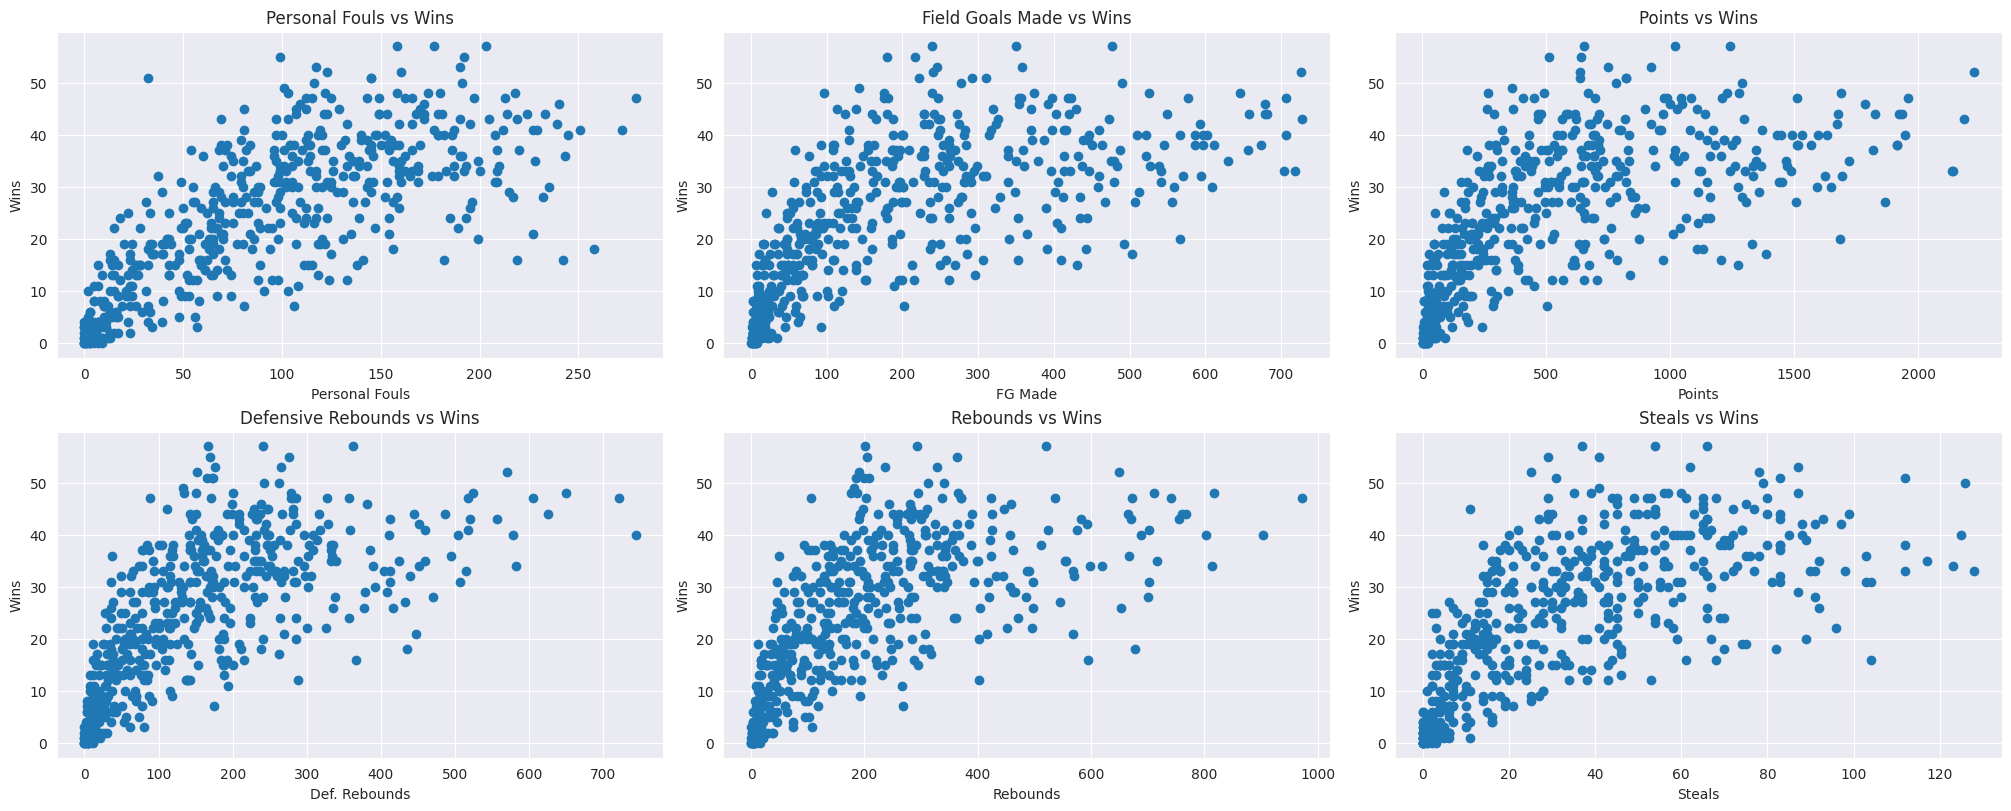

In [ ]:
fig, ax = plt.subplots(2, 3, constrained_layout = True, figsize = (20, 8))

ax[0,2].set_title('Points vs Wins')
ax[0,2].set_xlabel('Points')
ax[0,2].set_ylabel('Wins')
ax[0,2].scatter(df['PTS'], df['W'])
#correlation = 0.66

ax[0,1].set_title('Field Goals Made vs Wins')
ax[0,1].set_xlabel('FG Made')
ax[0,1].set_ylabel('Wins')
ax[0,1].scatter(df['FGM'], df['W'])
#correlation = 0.67

ax[1,0].set_title('Defensive Rebounds vs Wins')
ax[1,0].set_xlabel('Def. Rebounds')
ax[1,0].set_ylabel('Wins')
ax[1,0].scatter(df['DREB'], df['W'])
#correlation = 0.68 (def. rebounds are a subset of rebounds)

ax[1,1].set_title('Rebounds vs Wins')
ax[1,1].set_xlabel('Rebounds')
ax[1,1].set_ylabel('Wins')
ax[1,1].scatter(df['REB'], df['W'])
#correlation = 0.66

ax[1,2].set_title('Steals vs Wins')
ax[1,2].set_xlabel('Steals')
ax[1,2].set_ylabel('Wins')
ax[1,2].scatter(df['STL'], df['W'])
#correlation = 0.69

ax[0,0].set_title('Personal Fouls vs Wins')
ax[0,0].set_xlabel('Personal Fouls')
ax[0,0].set_ylabel('Wins')
ax[0,0].scatter(df['PF'], df['W'])
#correlation = 0.75
#keep in mind only a max of 6 personal fouls allowed per game


plt.show()

# Multivariate Anaylsis

In [ ]:
df2 = df.drop(columns=["Player", "POS","Team","Age","GP","L","Min","FGA","FG%","3PM","3PA","3P%","FTM","FTA","FT%","OREB","AST","TOV","BLK","FP","DD2","TD3","+/-"])
df2

,W,PTS,FGM,DREB,REB,STL,PF
0,52.0,2225.0,727.0,571.0,649.0,78.0,160.0
1,43.0,2183.0,728.0,557.0,670.0,66.0,205.0
2,33.0,2138.0,719.0,515.0,569.0,90.0,166.0
3,33.0,2135.0,704.0,270.0,329.0,112.0,192.0
4,47.0,1959.0,707.0,605.0,742.0,52.0,197.0
...,...,...,...,...,...,...,...
529,0.0,3.0,1.0,0.0,0.0,1.0,1.0
530,3.0,3.0,1.0,2.0,2.0,0.0,0.0
531,1.0,2.0,1.0,0.0,2.0,0.0,2.0
532,1.0,2.0,1.0,0.0,0.0,0.0,2.0


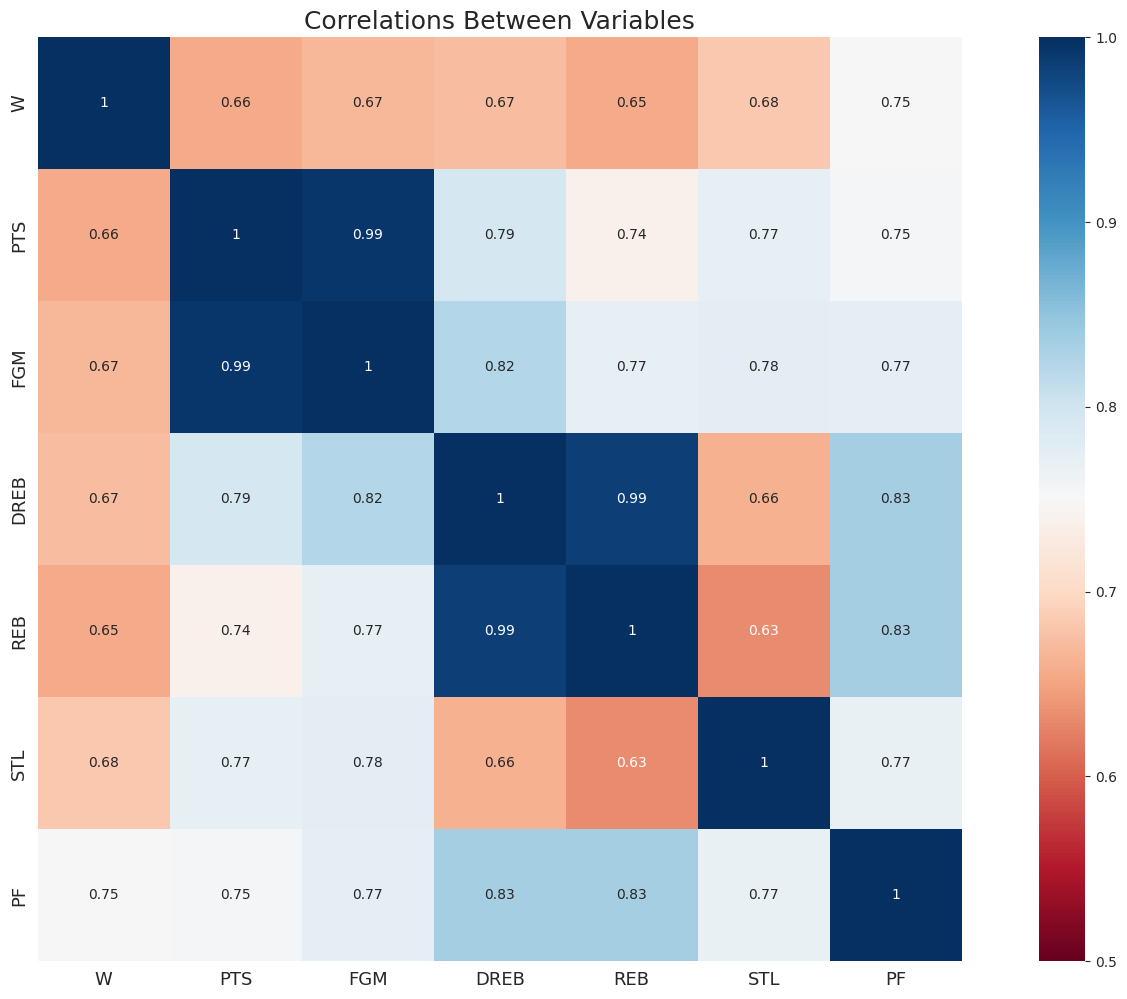

In [ ]:
plt.figure(figsize = (20,12))
sns.heatmap(df2.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=0.5)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show() # heat map that displays correlatoins

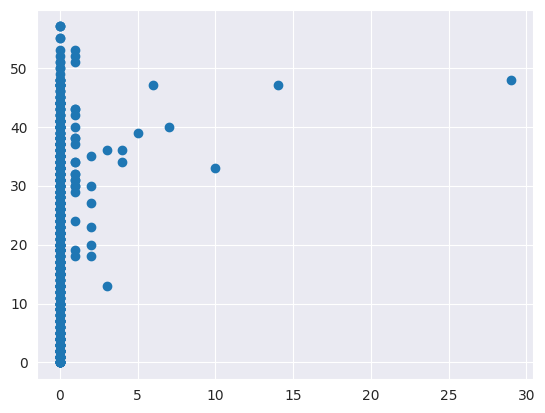

In [ ]:
plt.scatter(df['TD3'], df['W'])
plt.show()

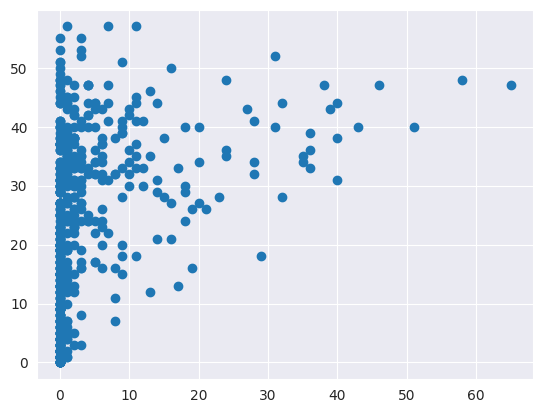

In [ ]:
plt.scatter(df['DD2'], df['W'])
a, b = np.polyfit(df['DD2'], df['W'], 1)
plt.plot(df['DD2'], a*(df['DD2'])+b, color='red',  linewidth=2)
plt.title('DDs vs Wins')
plt.xlabel('Double-Doubles')
plt.ylabel('Wins')
plt.show()